In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
import statsmodels.api as sm

In [54]:
#Verileri Ekledim
from google.colab import drive
drive.mount('/content/drive')
dollars_exchange_df  = pd.read_csv("/content/drive/My Drive/SeminerData/USD_TRY Geçmiş Verileri.csv")
euro_exchange_df  = pd.read_csv("/content/drive/My Drive/SeminerData/EUR_TRY Geçmiş Verileri.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
#Dataframe Bilgileri
dollars_exchange_df.info()
euro_exchange_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Tarih   3359 non-null   datetime64[ns]
 1   Şimdi   3359 non-null   float64       
 2   Açılış  3359 non-null   object        
 3   Yüksek  3359 non-null   object        
 4   Düşük   3359 non-null   object        
 5   Hac.    0 non-null      float64       
 6   Fark %  3359 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 183.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2609 entries, 0 to 2608
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Tarih   2609 non-null   datetime64[ns]
 1   Şimdi   2609 non-null   float64       
 2   Açılış  2609 non-null   object        
 3   Yüksek  2609 non-null   object        
 4   Düşük   2609 non-null   object        
 5   Hac.  

In [55]:
#2013-2023 Arası Günlük Dolar Kurunu Gösteren Veri
dollars_exchange_df


,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,30.12.2022,"18,6905","18,6960","18,7238","18,5262",NaN,"0,01%"
1,29.12.2022,"18,6877","18,7028","18,7504","18,6691",NaN,"-0,12%"
2,29.12.2022,"18,7096","18,7319","18,7464","18,5486",NaN,"0,11%"
3,28.12.2022,"18,6889","18,7009","18,7467","18,6688",NaN,"-0,16%"
4,28.12.2022,"18,7180","18,6692","18,7465","18,4954",NaN,"0,22%"
...,...,...,...,...,...,...,...
3354,07.01.2013,"1,7798","1,7826","1,7881","1,7770",NaN,"-0,11%"
3355,04.01.2013,"1,7818","1,7851","1,7926","1,7818",NaN,"-0,16%"
3356,03.01.2013,"1,7847","1,7787","1,7862","1,7756",NaN,"0,34%"
3357,02.01.2013,"1,7787","1,7838","1,7854","1,7750",NaN,"-0,29%"


In [115]:
df = pd.DataFrame(dollars_exchange_df)
df['Tarih'] = pd.to_datetime(df['Tarih'], format='%d.%m.%Y')
if ',' in str(df['Şimdi'].iloc[0]):
    df['Şimdi'] = df['Şimdi'].str.replace(',', '.').astype(float)

# Belirli bir tarih aralığını seçelim
start_date = '2013-01-01'
end_date = '2022-12-30'
selected_data = df.loc[(df['Tarih'] >= start_date) & (df['Tarih'] <= end_date)]

# Çeyrekliklerdeki normal kuru hesaplayan fonksiyon
def calculate_quarterly_mean(data):
    quarterly_data = data.set_index('Tarih').resample('Q').mean(numeric_only=True)
    return quarterly_data

# Çeyrekliklerdeki normal kurun hesaplanması
dollars_quarterly_means = calculate_quarterly_mean(dollars_exchange_df)

print(dollars_quarterly_means)

                Şimdi  Hac.
Tarih                      
2013-03-31   1.785427   NaN
2013-06-30   1.839143   NaN
2013-09-30   1.968797   NaN
2013-12-31   2.025153   NaN
2014-03-31   2.214245   NaN
2014-06-30   2.111592   NaN
2014-09-30   2.163745   NaN
2014-12-31   2.262641   NaN
2015-03-31   2.464270   NaN
2015-06-30   2.664875   NaN
2015-09-30   2.855556   NaN
2015-12-31   2.907550   NaN
2016-03-31   2.941357   NaN
2016-06-30   2.897952   NaN
2016-09-30   2.966609   NaN
2016-12-31   3.293663   NaN
2017-03-31   3.694371   NaN
2017-06-30   3.577342   NaN
2017-09-30   3.512895   NaN
2017-12-31   3.801755   NaN
2018-03-31   3.817212   NaN
2018-06-30   4.373655   NaN
2018-09-30   5.659031   NaN
2018-12-31   5.499506   NaN
2019-03-31   5.364261   NaN
2019-06-30   5.872934   NaN
2019-09-30   5.675033   NaN
2019-12-31   5.808991   NaN
2020-03-31   6.115953   NaN
2020-06-30   6.864225   NaN
2020-09-30   7.234886   NaN
2020-12-31   7.862767   NaN
2021-03-31   7.408288   NaN
2021-06-30   8.39643

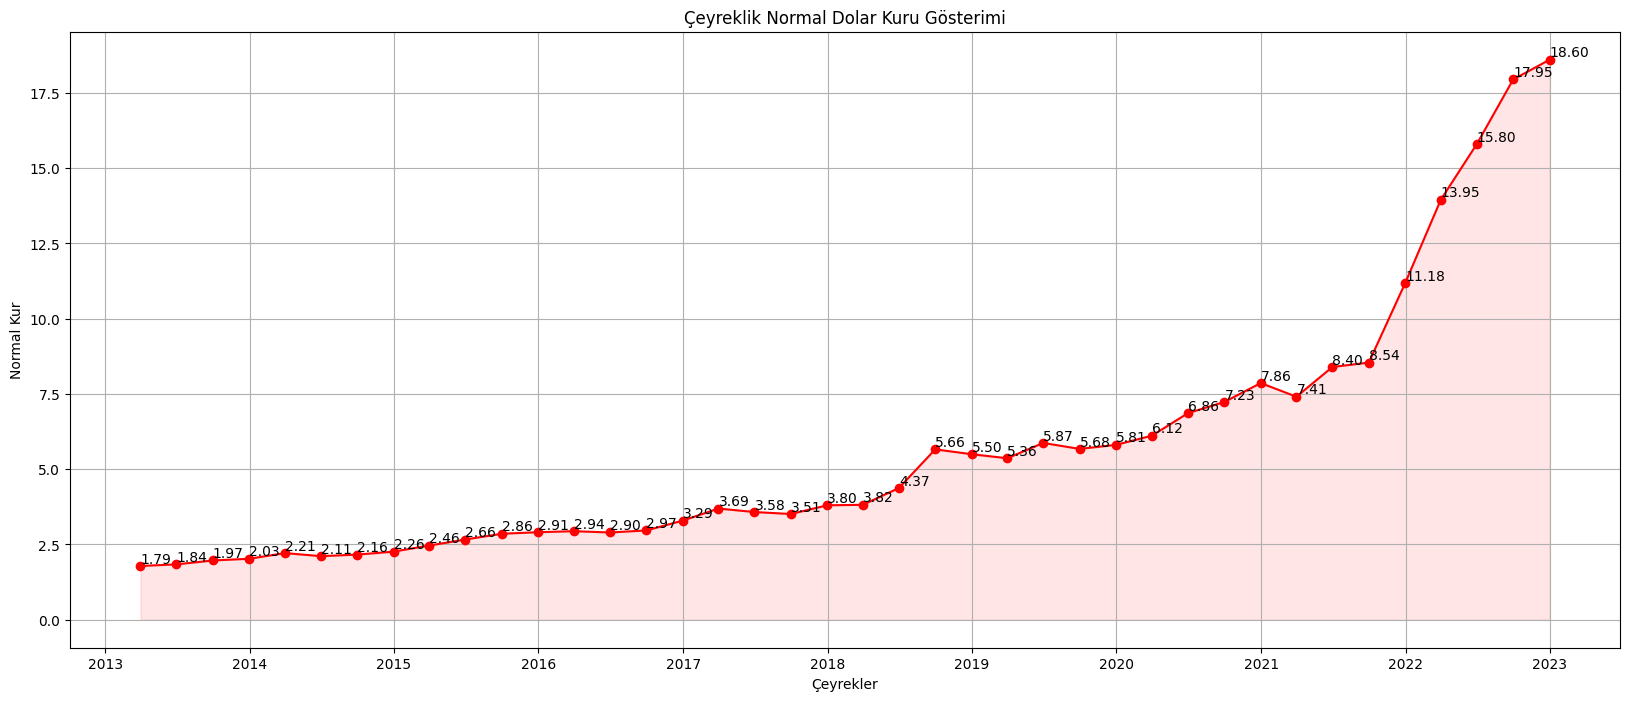

In [135]:
plt.figure(figsize=(20, 8))
plt.plot(dollars_quarterly_means.index, dollars_quarterly_means['Şimdi'], marker='o', linestyle='-', color = 'red')
plt.title('Çeyreklik Normal Dolar Kuru Gösterimi')
plt.xlabel('Çeyrekler')
plt.ylabel('Normal Kur')

for i, value in enumerate(dollars_quarterly_means['Şimdi']):
    plt.text(dollars_quarterly_means.index[i], value, f'{value:.2f}', ha='left', va='bottom')

plt.fill_between(dollars_quarterly_means.index, dollars_quarterly_means['Şimdi'], color='red', alpha=0.1, label='Alan Rengi')


plt.grid(True)
plt.show()

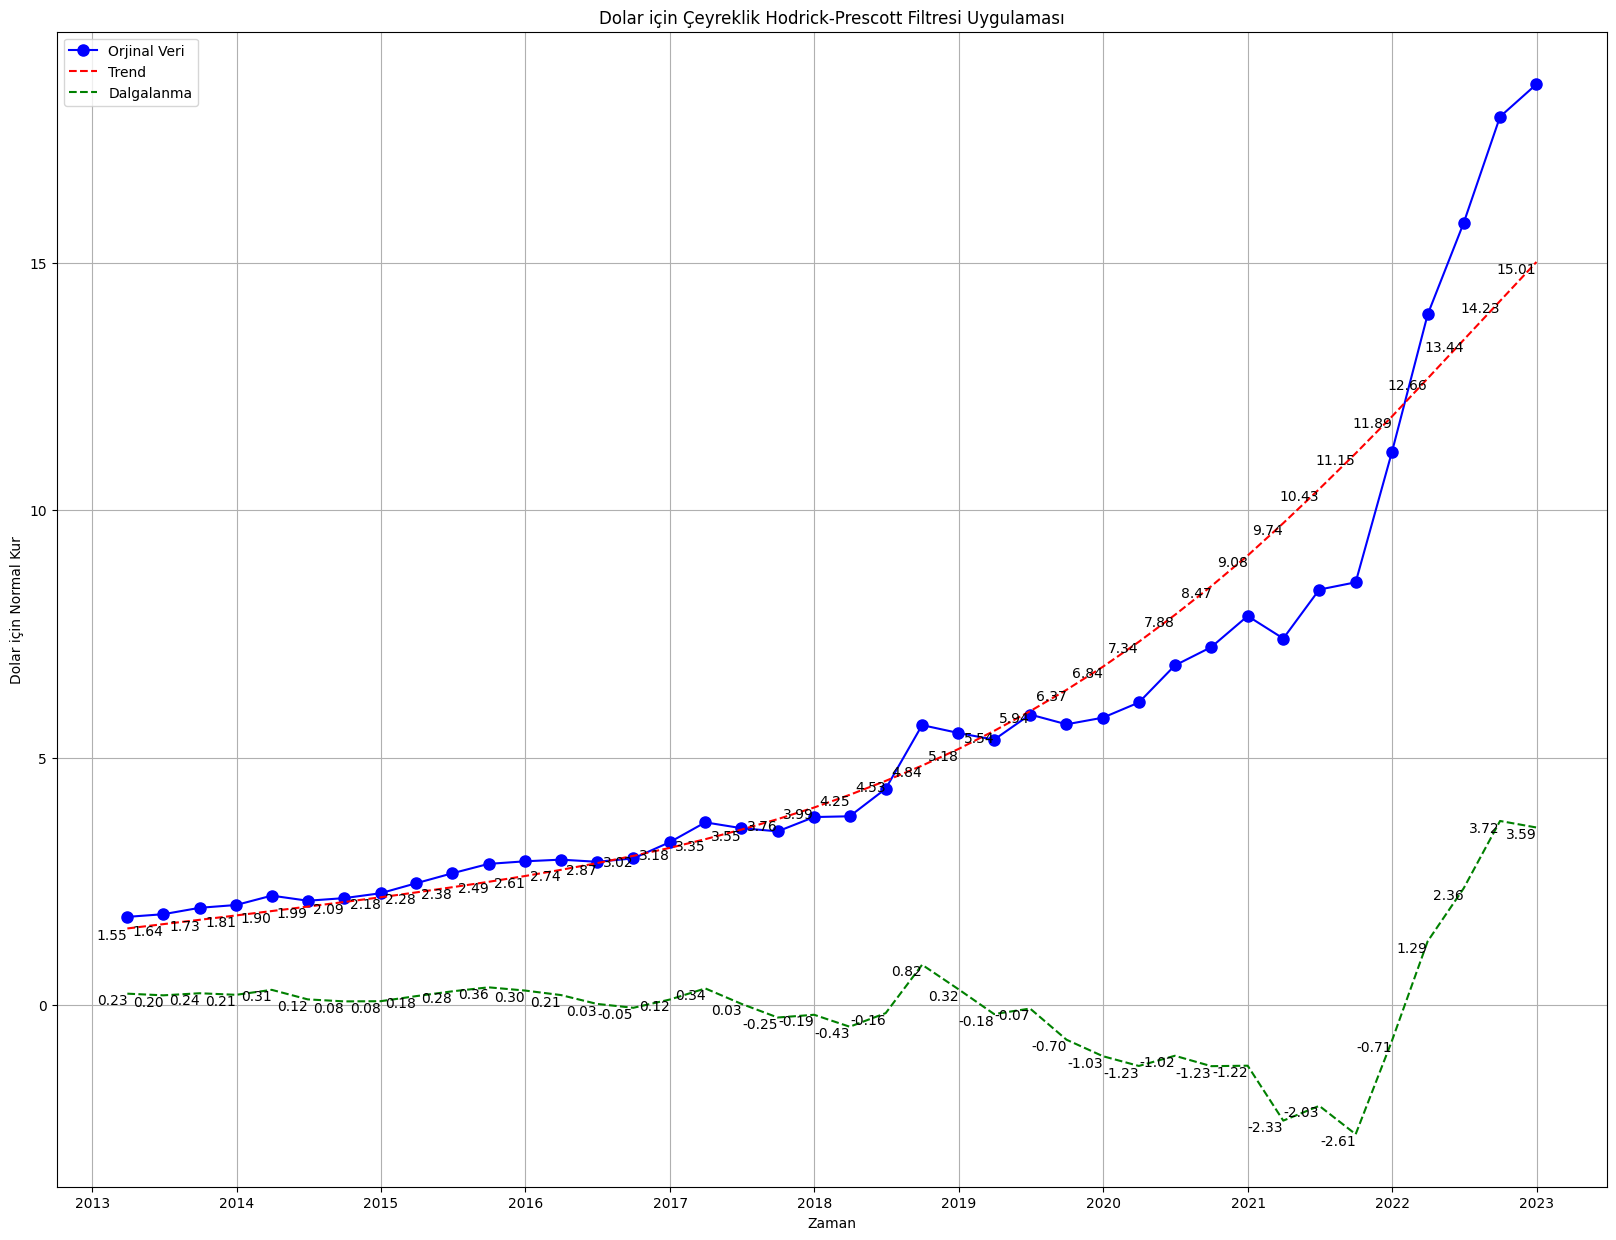

In [150]:
# Hodrick-Prescott filtresi
cycle, trend = sm.tsa.filters.hpfilter(dollars_quarterly_means['Şimdi'], lamb=1600)

plt.figure(figsize=(20, 15))

# Orjinal veri
plt.plot(dollars_quarterly_means.index, dollars_quarterly_means['Şimdi'], label='Orjinal Veri', marker='o', linestyle='-', color='blue', markersize=8)

# Trend
plt.plot(dollars_quarterly_means.index, trend, label='Trend', linestyle='--', color='red')

# Dalgalanma
plt.plot(dollars_quarterly_means.index, cycle, label='Dalgalanma', linestyle='--', color='green')

# Başlık ve etiketler
plt.title('Dolar için Çeyreklik Hodrick-Prescott Filtresi Uygulaması')
plt.xlabel('Zaman')
plt.ylabel('Dolar için Normal Kur')

# Detaylar
for i, value in enumerate(trend):
    plt.text(dollars_quarterly_means.index[i], value, f'{value:.2f}', ha='right', va='top')

for i, value in enumerate(cycle):
    plt.text(dollars_quarterly_means.index[i], value, f'{value:.2f}', ha='right', va='top')


# Etiketler
plt.legend()

plt.grid(True)
plt.show()

In [75]:
#2013-2023 Arası Günlük Euro Kurunu Gösteren Veri
euro_exchange_df


,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,2022-12-30,20.0002,"19,9501","20,0696","19,8132",NaN,"0,35%"
1,2022-12-29,19.9298,"19,8636","20,0313","19,7582",NaN,"0,39%"
2,2022-12-28,19.8519,"19,9028","20,0369","19,7383",NaN,"-0,03%"
3,2022-12-27,19.8578,"19,8791","20,0578","19,7607",NaN,"0,06%"
4,2022-12-26,19.8468,"19,8118","19,9733","19,6908",NaN,"0,19%"
...,...,...,...,...,...,...,...
2604,2013-01-07,2.3351,"2,3289","2,3376","2,3155",NaN,"0,26%"
2605,2013-01-04,2.3291,"2,3271","2,3348","2,3196",NaN,"-0,02%"
2606,2013-01-03,2.3296,"2,3438","2,3493","2,3226",NaN,"-0,68%"
2607,2013-01-02,2.3455,"2,3520","2,3688","2,3381",NaN,"-0,32%"


In [123]:
df = pd.DataFrame(euro_exchange_df)
df['Tarih'] = pd.to_datetime(df['Tarih'], format='%d.%m.%Y')
if ',' in str(df['Şimdi'].iloc[0]):
    df['Şimdi'] = df['Şimdi'].str.replace(',', '.').astype(float)

# Çeyrekliklerdeki normal kurun hesaplanması
euro_quarterly_means = calculate_quarterly_mean(euro_exchange_df)

print(euro_quarterly_means)

                Şimdi  Hac.
Tarih                      
2013-03-31   2.356248   NaN
2013-06-30   2.402631   NaN
2013-09-30   2.610630   NaN
2013-12-31   2.757432   NaN
2014-03-31   3.034341   NaN
2014-06-30   2.896395   NaN
2014-09-30   2.866398   NaN
2014-12-31   2.825326   NaN
2015-03-31   2.772839   NaN
2015-06-30   2.950085   NaN
2015-09-30   3.178430   NaN
2015-12-31   3.184670   NaN
2016-03-31   3.246985   NaN
2016-06-30   3.272469   NaN
2016-09-30   3.311591   NaN
2016-12-31   3.545971   NaN
2017-03-31   3.936238   NaN
2017-06-30   3.938466   NaN
2017-09-30   4.128274   NaN
2017-12-31   4.477660   NaN
2018-03-31   4.690343   NaN
2018-06-30   5.205146   NaN
2018-09-30   6.579006   NaN
2018-12-31   6.275198   NaN
2019-03-31   6.091730   NaN
2019-06-30   6.593318   NaN
2019-09-30   6.304548   NaN
2019-12-31   6.417697   NaN
2020-03-31   6.734882   NaN
2020-06-30   7.555857   NaN
2020-09-30   8.452656   NaN
2020-12-31   9.377120   NaN
2021-03-31   8.915034   NaN
2021-06-30  10.10512

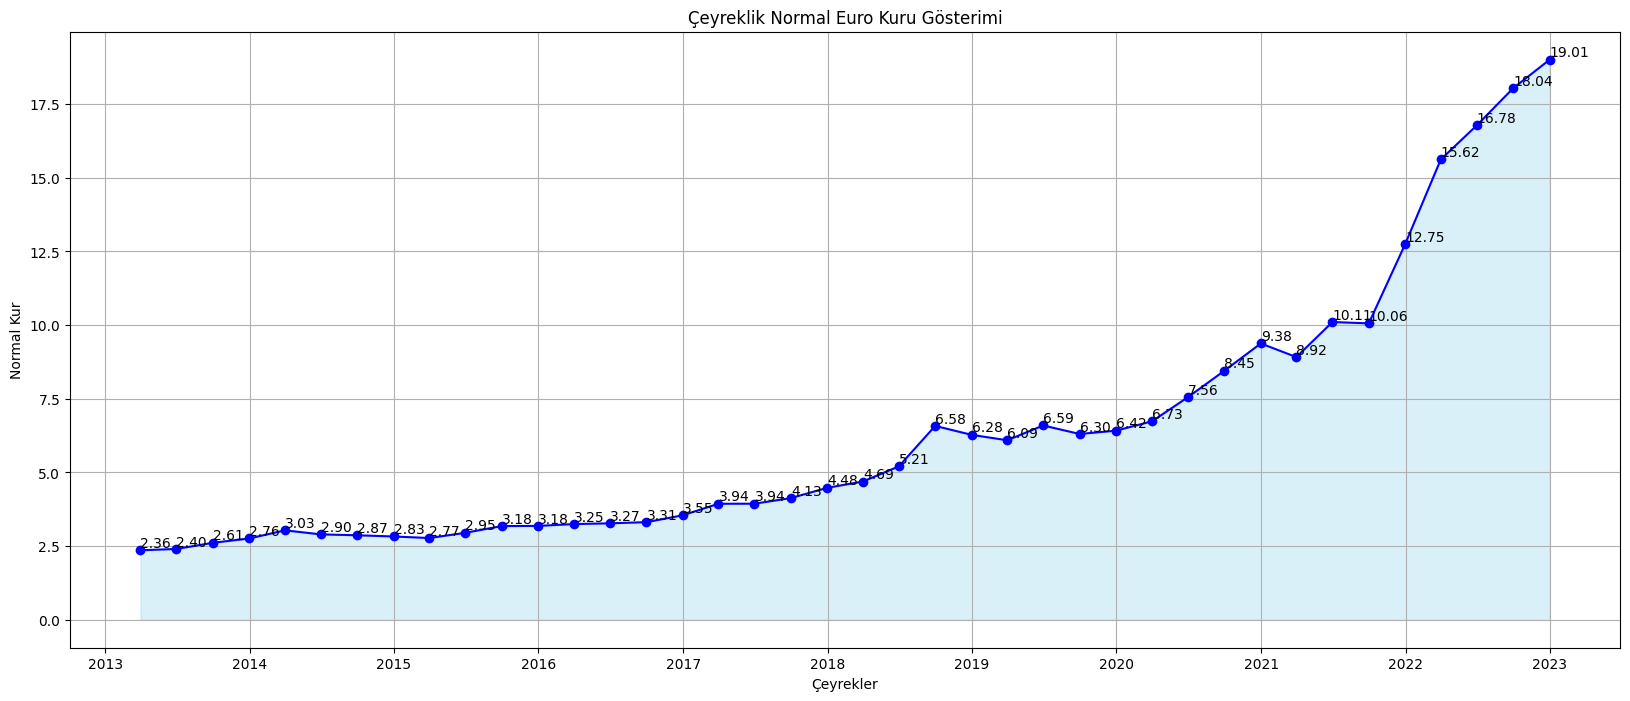

In [137]:
plt.figure(figsize=(20, 8))
plt.plot(euro_quarterly_means.index, euro_quarterly_means['Şimdi'], marker='o', linestyle='-', color = 'blue')
plt.title('Çeyreklik Normal Euro Kuru Gösterimi')
plt.xlabel('Çeyrekler')
plt.ylabel('Normal Kur')
plt.grid(True)

for i, value in enumerate(euro_quarterly_means['Şimdi']):
    plt.text(euro_quarterly_means.index[i], value, f'{value:.2f}', ha='left', va='bottom')

plt.fill_between(euro_quarterly_means.index, euro_quarterly_means['Şimdi'], color='skyblue', alpha=0.3, label='Alan Rengi')


plt.show()

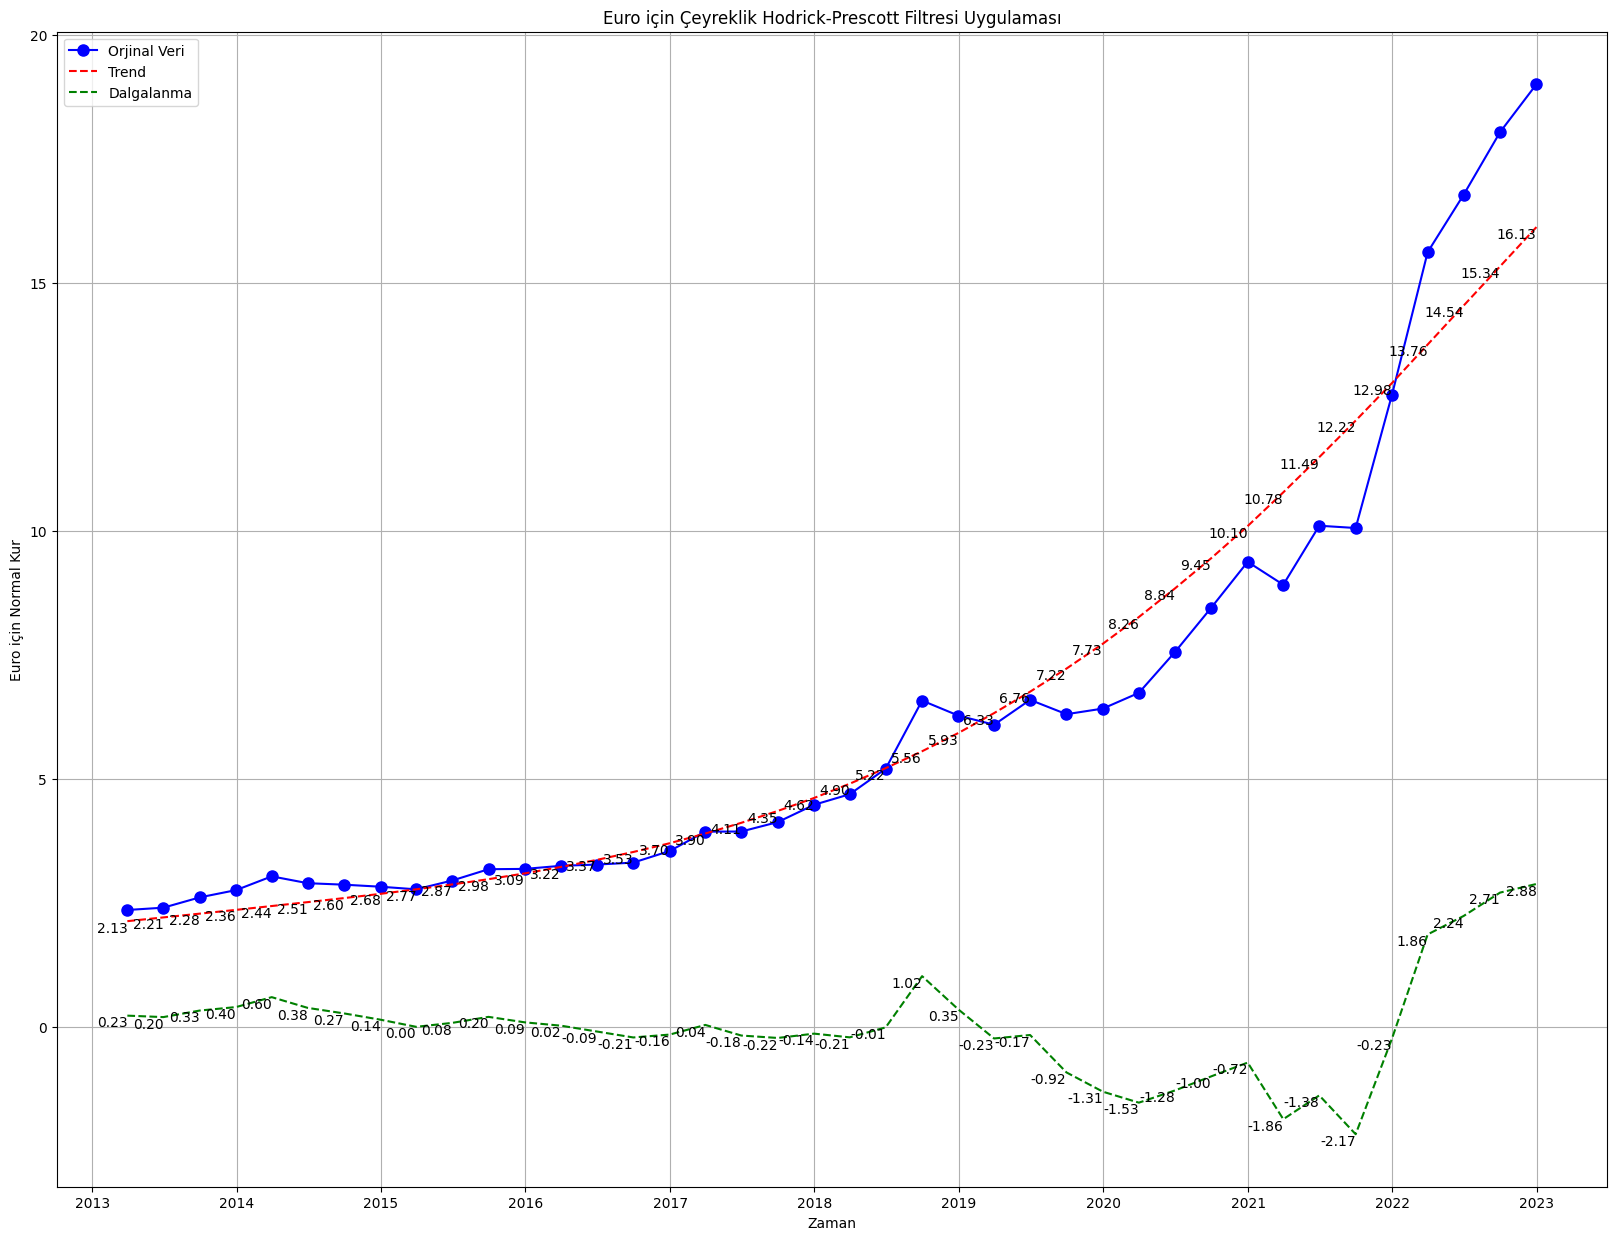

In [149]:
# Hodrick-Prescott filtresi
cycle, trend = sm.tsa.filters.hpfilter(euro_quarterly_means['Şimdi'], lamb=1600)

plt.figure(figsize=(20, 15))

# Orjinal veri
plt.plot(euro_quarterly_means.index, euro_quarterly_means['Şimdi'], label='Orjinal Veri', marker='o', linestyle='-', color='blue', markersize=8)

# Trend
plt.plot(euro_quarterly_means.index, trend, label='Trend', linestyle='--', color='red')

# Dalgalanma
plt.plot(euro_quarterly_means.index, cycle, label='Dalgalanma', linestyle='--', color='green')

# Başlık ve etiketler
plt.title('Euro için Çeyreklik Hodrick-Prescott Filtresi Uygulaması')
plt.xlabel('Zaman')
plt.ylabel('Euro için Normal Kur')

# Detaylar
for i, value in enumerate(trend):
    plt.text(euro_quarterly_means.index[i], value, f'{value:.2f}', ha='right', va='top')

for i, value in enumerate(cycle):
    plt.text(euro_quarterly_means.index[i], value, f'{value:.2f}', ha='right', va='top')


# Etiketler
plt.legend()

plt.grid(True)
plt.show()